## Preprocessing of Data

Before performing any analysis or modeling, it is important to preprocess the data to ensure its quality and suitability for the task at hand. The preprocessing steps typically include:

1. **Text Cleaning**: This involves removing any unnecessary characters, symbols, or special characters from the text data. It may also involve converting the text to lowercase for consistency.

2. **Tokenization**: Tokenization is the process of splitting the text into individual words or tokens. This step is important for further analysis as it allows us to work with individual words rather than the entire text.

3. **Normalization**: Normalization involves transforming words to their base or root form. This step helps in reducing the dimensionality of the data and ensures that different forms of the same word are treated as the same.

4. **Vectorization**: Vectorization is the process of converting text data into numerical representations that can be used by machine learning algorithms. Common techniques for vectorization include Bag-of-Words, TF-IDF, and Word Embeddings.

## Exploratory Data Analysis (EDA)

EDA is a crucial step in understanding the data and gaining insights before performing any modeling or analysis. Some common EDA techniques for text data include:

**Word Frequency Analysis**: Analyzing the frequency of words in the text can provide insights into the most common and important words in the dataset. This can be done by creating a word frequency distribution or using visualization techniques such as word clouds.

## Word Clouds

Word clouds are a popular visualization technique used to represent the most frequent words in a text corpus. They provide a visual summary of the text data, with the size of each word indicating its frequency or importance. Word clouds can be created for both pre-processing and post-processing stages to compare the changes in word frequencies.
I have produced a word cloud both pre and post text cleaning .

In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
df=pd.read_csv('text.csv')
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [27]:
X = df['text']
y = df['label']

In [28]:
classes_names = { 0:'sadness',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}
classes_names

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

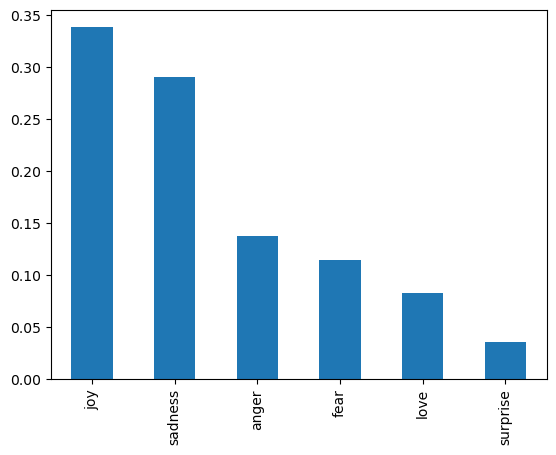

In [6]:
y.replace(classes_names).value_counts(normalize=True).plot(kind='bar');

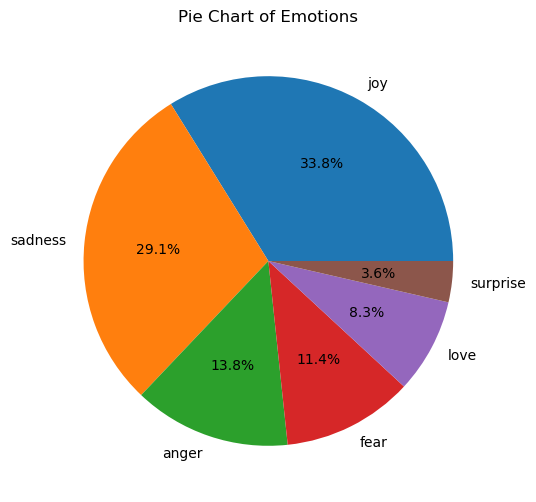

In [29]:
import matplotlib.pyplot as plt

# 3rd column contains the labels
labels = df.iloc[:, 2]

# Create a dictionary to map labels to emotions
label_dict = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Replace numeric labels with emotion names
labels = labels.map(label_dict)

# Count the frequency of each label
label_counts = labels.value_counts()

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Emotions')
plt.show()

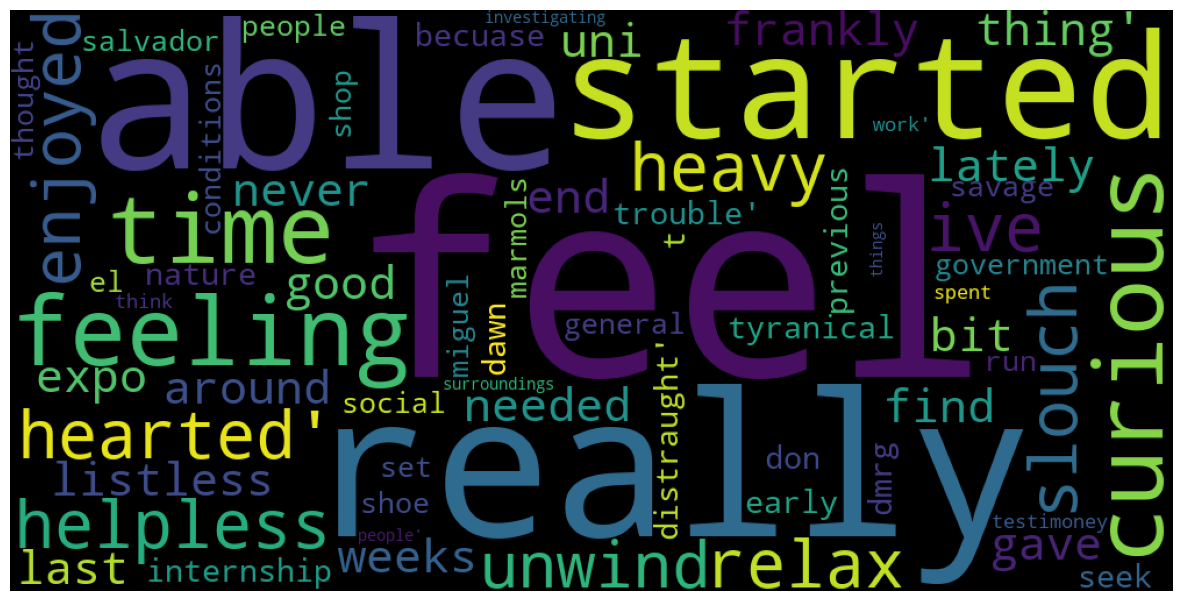

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' column contains the tweet texts
text = df['text'].values 

# Create a word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(str(text))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [31]:
def f(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text
X = X.apply(f)
X

0             i just feel really helpless and heavy hearted
1         ive enjoyed being able to slouch about relax a...
2         i gave up my internship with the dmrg and am f...
3                                i dont know i feel so lost
4         i am a kindergarten teacher and i am thoroughl...
                                ...                        
416804    i feel like telling these horny devils to find...
416805    i began to realize that when i was feeling agi...
416806    i feel very curious be why previous early dawn...
416807    i feel that becuase of the tyranical nature of...
416808    i think that after i had spent some time inves...
Name: text, Length: 416809, dtype: object

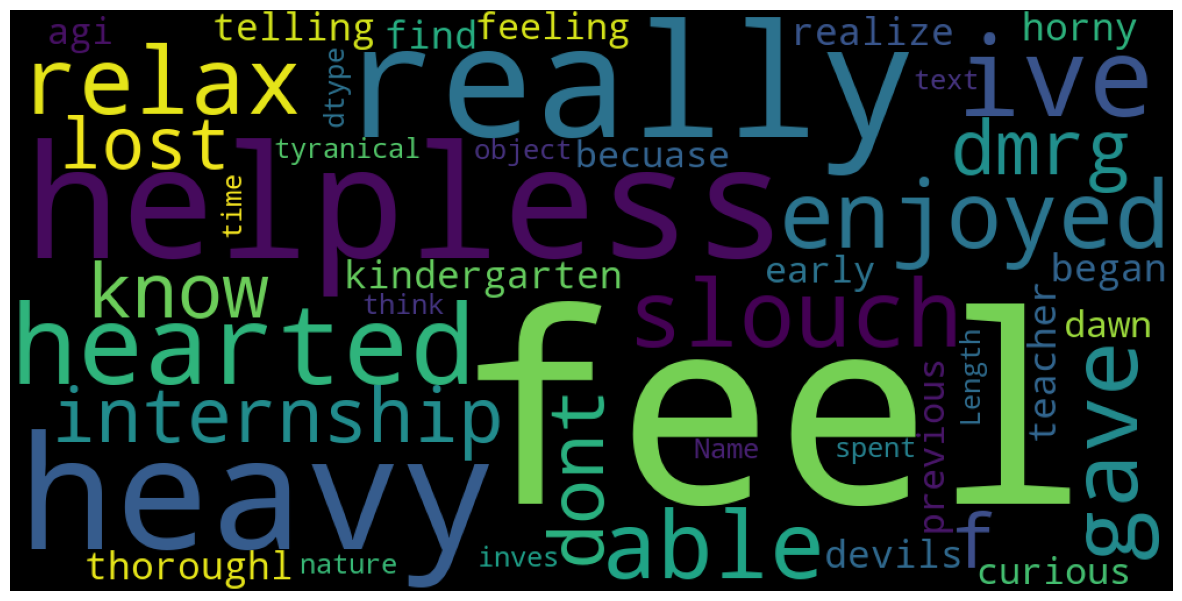

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = X
wordcloud = WordCloud(width = 1000, height = 500).generate(str(text))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [34]:
score_baseline = y.value_counts(normalize=True).max()
score_baseline

0.3384451871240784

In [35]:

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(XV_train, y_train)


LogisticRegression(max_iter=1000)

In [36]:
pred_lr=logistic_regression.predict(XV_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
print(f'Accuracy of Logistic Regression: {accuracy_lr}')



Accuracy of Logistic Regression: 0.8944363139080156


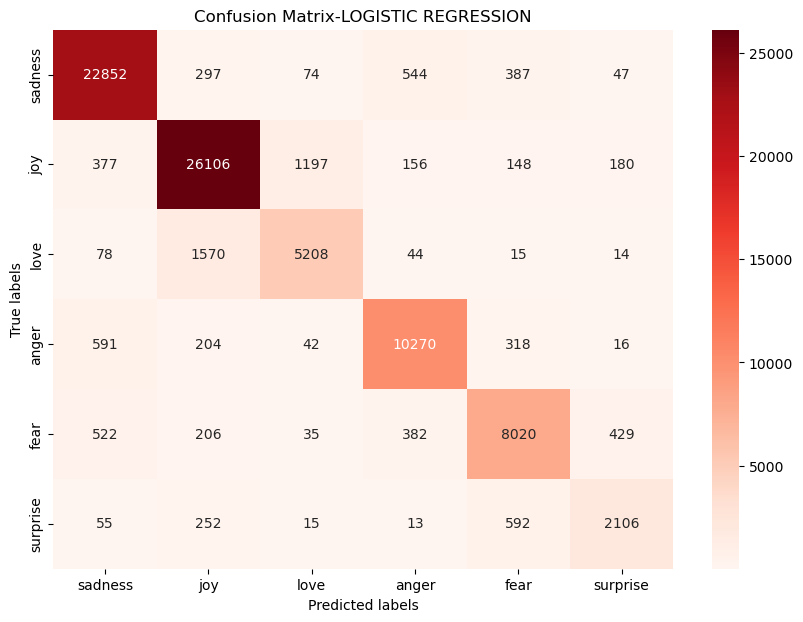

              precision    recall  f1-score   support

     sadness       0.93      0.94      0.94     24201
         joy       0.91      0.93      0.92     28164
        love       0.79      0.75      0.77      6929
       anger       0.90      0.90      0.90     11441
        fear       0.85      0.84      0.84      9594
    surprise       0.75      0.69      0.72      3033

    accuracy                           0.89     83362
   macro avg       0.86      0.84      0.85     83362
weighted avg       0.89      0.89      0.89     83362



In [53]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, pred_lr)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix-LOGISTIC REGRESSION')
plt.show()

cr = classification_report(y_test, pred_lr, target_names=label_dict.values())
print(cr)

# Create a confusion matrix
# cm = confusion_matrix(y_test, pred_nb)



Accuracy for logistic_regression: 0.89
ROC-AUC for logistic_regression: 0.99
Log Loss for logistic_regression: 0.26


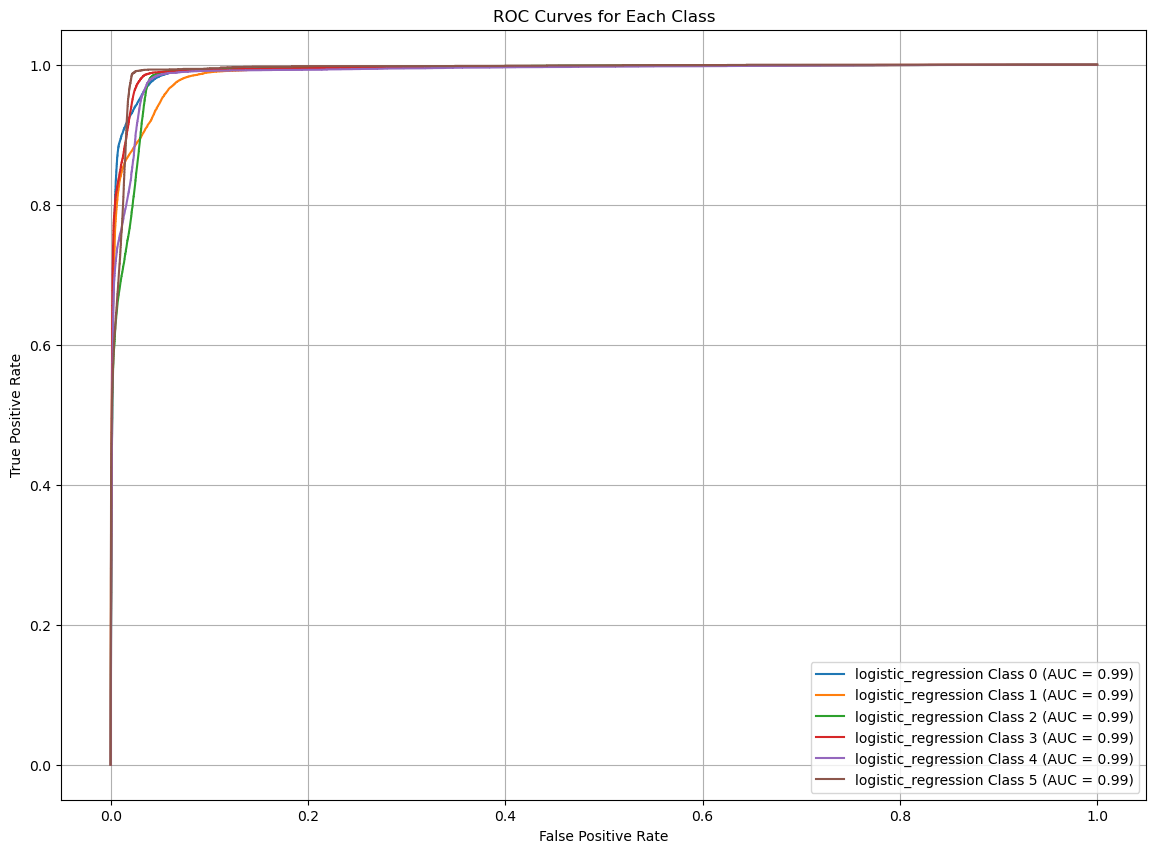

In [50]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
y_pred_logistic_regression = logistic_regression.predict(XV_test)
y_pred_prob_logistic_regression= logistic_regression.predict_proba(XV_test)

accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"Accuracy for logistic_regression: {accuracy_logistic_regression:.2f}")

enc = OneHotEncoder()
y_test_1= y_test.to_numpy()
y_test_enc = enc.fit_transform(y_test_1.reshape(-1, 1)).toarray()

roc_auc_logistic_regression = roc_auc_score(y_test_enc, y_pred_prob_logistic_regression, multi_class='ovr')
print(f"ROC-AUC for logistic_regression: {roc_auc_logistic_regression:.2f}")


log_loss_logistic = log_loss(y_test, y_pred_prob_logistic_regression)
print(f"Log Loss for logistic_regression: {log_loss_logistic:.2f}")

plt.figure(figsize=(14, 10))
for i in range(y_test_enc.shape[1]):
    fpr_logistic, tpr_logistic, _ = roc_curve(y_test_enc[:, i], y_pred_prob_logistic_regression[:, i])
    plt.plot(fpr_logistic, tpr_logistic, label=f'logistic_regression Class {i} (AUC = {roc_auc_score(y_test_enc[:, i], y_pred_prob_logistic_regression[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_classifier = MultinomialNB()
nb_classifier.fit(XV_train, y_train)
y_pred = nb_classifier.predict(XV_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# print(classification_report(y_test, y_pred))


Accuracy: 0.74


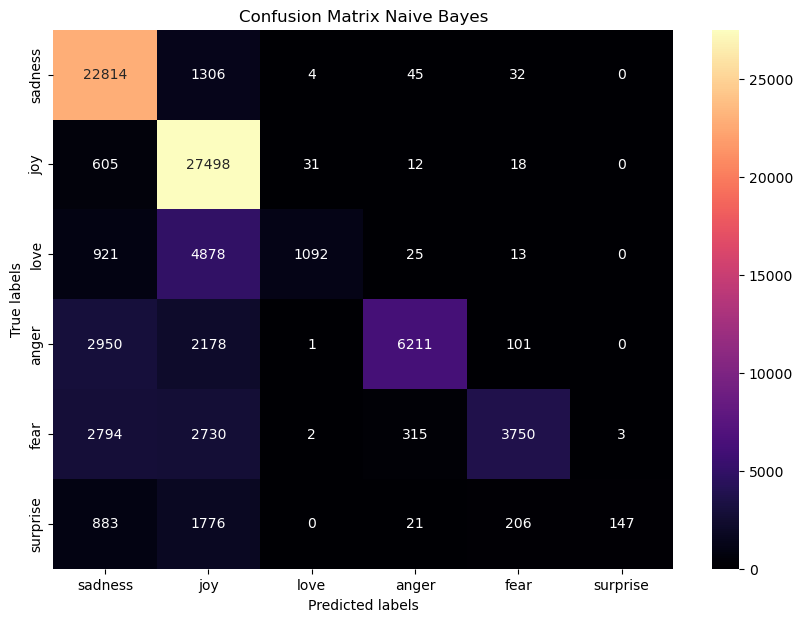

              precision    recall  f1-score   support

     sadness       0.74      0.94      0.83     24201
         joy       0.68      0.98      0.80     28164
        love       0.97      0.16      0.27      6929
       anger       0.94      0.54      0.69     11441
        fear       0.91      0.39      0.55      9594
    surprise       0.98      0.05      0.09      3033

    accuracy                           0.74     83362
   macro avg       0.87      0.51      0.54     83362
weighted avg       0.79      0.74      0.69     83362



In [87]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

# Create a classification report
cr = classification_report(y_test, y_pred, target_names=label_dict.values())
print(cr)

Accuracy for Naive Bayes: 0.74
ROC-AUC for Naive Bayes: 0.97
Log Loss for Naive Bayes: 0.82


c:\Users\halog\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


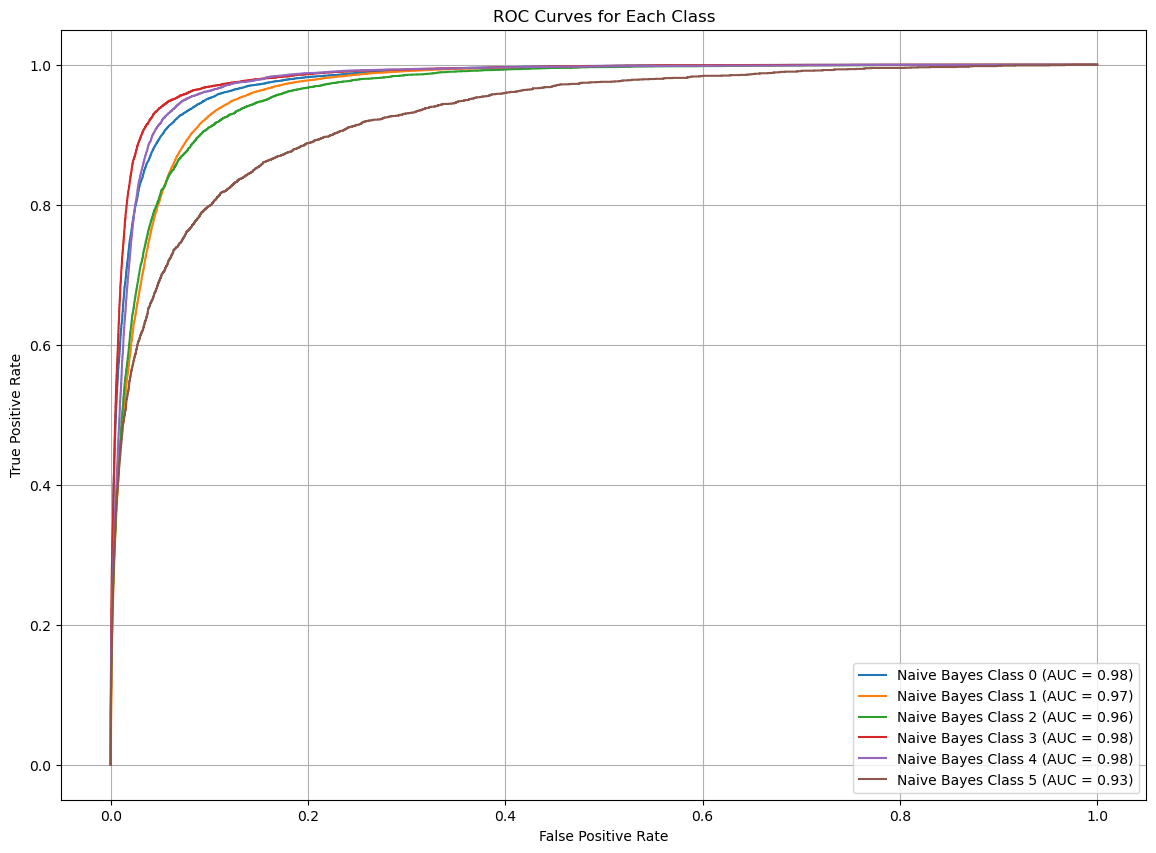

In [78]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
y_pred_nb = nb_classifier.predict(XV_test)
y_pred_prob_nb = nb_classifier.predict_proba(XV_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy for Naive Bayes: {accuracy_nb:.2f}")

enc = OneHotEncoder()
y_test_1= y_test.to_numpy()
y_test_enc = enc.fit_transform(y_test_1.reshape(-1, 1)).toarray()

roc_auc_nb = roc_auc_score(y_test_enc, y_pred_prob_nb, multi_class='ovr')
print(f"ROC-AUC for Naive Bayes: {roc_auc_nb:.2f}")


log_loss_nb = log_loss(y_test, y_pred_prob_nb)
print(f"Log Loss for Naive Bayes: {log_loss_nb:.2f}")

plt.figure(figsize=(14, 10))
for i in range(y_test_enc.shape[1]):
    fpr_nb, tpr_nb, _ = roc_curve(y_test_enc[:, i], y_pred_prob_nb[:, i])
    plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes Class {i} (AUC = {roc_auc_score(y_test_enc[:, i], y_pred_prob_nb[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.grid(True)
plt.show()


In [38]:

xgb = XGBClassifier(max_depth=6)
xgb.fit(XV_train, y_train)
pred_xgb = xgb.predict(XV_test)
accuracy_xgb = accuracy_score(y_test, pred_xgb)
accuracy_xgb



0.8939324872243948

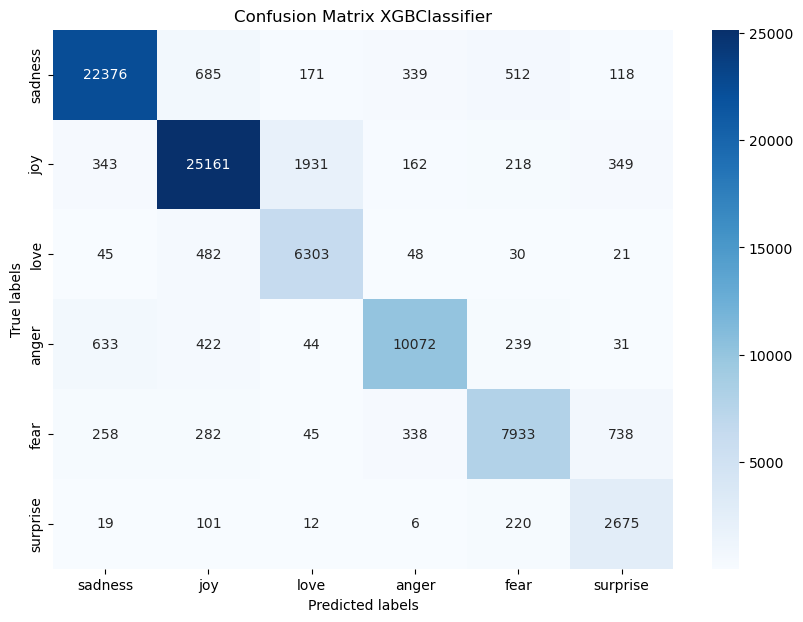

              precision    recall  f1-score   support

     sadness       0.95      0.92      0.93     24201
         joy       0.93      0.89      0.91     28164
        love       0.74      0.91      0.82      6929
       anger       0.92      0.88      0.90     11441
        fear       0.87      0.83      0.85      9594
    surprise       0.68      0.88      0.77      3033

    accuracy                           0.89     83362
   macro avg       0.85      0.89      0.86     83362
weighted avg       0.90      0.89      0.90     83362



In [54]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, pred_xgb)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBClassifier')
plt.show()

# Create a classification report
cr = classification_report(y_test, pred_xgb, target_names=label_dict.values())
print(cr)

Confusion Matrix for XGBoost:
[[22376   685   171   339   512   118]
 [  343 25161  1931   162   218   349]
 [   45   482  6303    48    30    21]
 [  633   422    44 10072   239    31]
 [  258   282    45   338  7933   738]
 [   19   101    12     6   220  2675]]
Accuracy for XGBoost: 0.89
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     24201
           1       0.93      0.89      0.91     28164
           2       0.74      0.91      0.82      6929
           3       0.92      0.88      0.90     11441
           4       0.87      0.83      0.85      9594
           5       0.68      0.88      0.77      3033

    accuracy                           0.89     83362
   macro avg       0.85      0.89      0.86     83362
weighted avg       0.90      0.89      0.90     83362

ROC-AUC for XGBoost: 0.99
Log Loss for XGBoost: 0.41


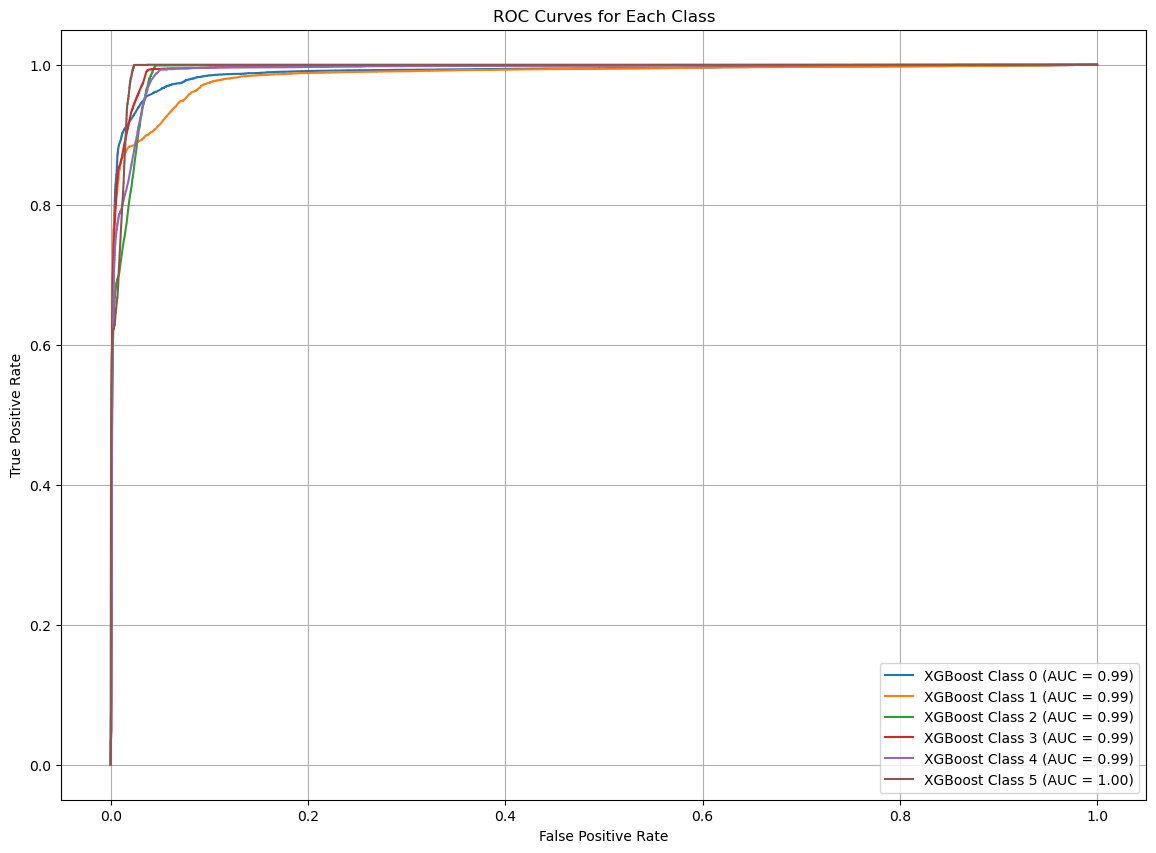

In [49]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
y_pred_xgb = xgb.predict(XV_test)
y_pred_prob_xgb = xgb.predict_proba(XV_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy for XGBoost: {accuracy_xgb:.2f}")

enc = OneHotEncoder()
y_test_1= y_test.to_numpy()
y_test_enc = enc.fit_transform(y_test_1.reshape(-1, 1)).toarray()

roc_auc_xgb = roc_auc_score(y_test_enc, y_pred_prob_xgb, multi_class='ovr')
print(f"ROC-AUC for XGBoost: {roc_auc_xgb:.2f}")


log_loss_xgb = log_loss(y_test, y_pred_prob_xgb)
print(f"Log Loss for XGBoost: {log_loss_xgb:.2f}")

plt.figure(figsize=(14, 10))
for i in range(y_test_enc.shape[1]):
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_enc[:, i], y_pred_prob_xgb[:, i])
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost Class {i} (AUC = {roc_auc_score(y_test_enc[:, i], y_pred_prob_xgb[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
#shape of the xv
from sklearn.preprocessing import OneHotEncoder
XV_train.shape
enc = OneHotEncoder()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# One-hot encode the target variables
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train.reshape(-1, 1)).toarray().T
y_test = enc.transform(y_test.reshape(-1, 1)).toarray().T

In [14]:
# do feature selection and dimentioanlity reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2

svd = TruncatedSVD(n_components=1000)
XV_train = svd.fit_transform(XV_train)
XV_test = svd.transform(XV_test)

XV_train.shape

(333447, 1000)

In [15]:
XV_train=XV_train.T
XV_test=XV_test.T
# y_train = y_train.T
# y_test = y_test.T

In [17]:
#do neural network
from neuralnet import NeuralNetwork
from neuralnet import LeakyReLU,LogLoss,Sigmoid,Tanh,Layer
from sklearn.preprocessing import OneHotEncoder
net=NeuralNetwork([Layer(1000, 256, LeakyReLU()),Layer(256, 32,  LeakyReLU()),Layer(32, 6, Sigmoid()),],LogLoss(),0.05)

epochs = 100
batch_size = 64
for epoch in range(epochs):
    for i in range(0, XV_train.shape[1], batch_size):
        x_batch = XV_train[:, i:i+batch_size]
        t_batch = y_train[:,i:i+batch_size]
        net.train(x_batch, t_batch)
    print(f"Epoch {epoch+1}/{epochs} completed")

# for epoch in range(epochs):
#     print(f"Epoch {epoch+1}/{epochs}")
#     for i in tqdm(range(0, X_train.shape[1], batch_size), desc="Training"):
#         x_batch = X_train[:, i:i+batch_size]
#         t_batch = y_train[:, i:i+batch_size]
#         net.train(x_batch, t_batch)
# # Testing the network
predictions = []
for i in range(XV_test.shape[1]):
    x = XV_test[:, i].reshape(-1, 1)
    out = net.forward_pass(x)
    predictions.append(np.argmax(out))

y_test_labels = np.argmax(y_test, axis=0)
accuracy = accuracy_score(y_test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100 completed
Epoch 2/100 completed
Epoch 3/100 completed
Epoch 4/100 completed
Epoch 5/100 completed
Epoch 6/100 completed
Epoch 7/100 completed
Epoch 8/100 completed
Epoch 9/100 completed
Epoch 10/100 completed
Epoch 11/100 completed
Epoch 12/100 completed
Epoch 13/100 completed
Epoch 14/100 completed
Epoch 15/100 completed
Epoch 16/100 completed
Epoch 17/100 completed
Epoch 18/100 completed
Epoch 19/100 completed
Epoch 20/100 completed
Epoch 21/100 completed
Epoch 22/100 completed
Epoch 23/100 completed
Epoch 24/100 completed
Epoch 25/100 completed
Epoch 26/100 completed
Epoch 27/100 completed
Epoch 28/100 completed
Epoch 29/100 completed
Epoch 30/100 completed
Epoch 31/100 completed
Epoch 32/100 completed
Epoch 33/100 completed
Epoch 34/100 completed
Epoch 35/100 completed
Epoch 36/100 completed
Epoch 37/100 completed
Epoch 38/100 completed
Epoch 39/100 completed
Epoch 40/100 completed
Epoch 41/100 completed
Epoch 42/100 completed
Epoch 43/100 completed
Epoch 44/100 complet

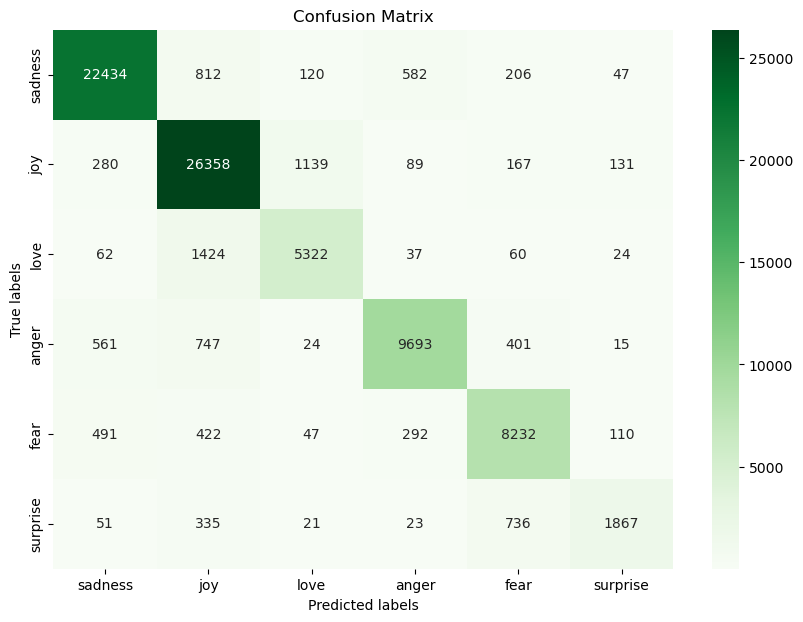

              precision    recall  f1-score   support

     sadness       0.94      0.93      0.93     24201
         joy       0.88      0.94      0.90     28164
        love       0.80      0.77      0.78      6929
       anger       0.90      0.85      0.87     11441
        fear       0.84      0.86      0.85      9594
    surprise       0.85      0.62      0.71      3033

    accuracy                           0.89     83362
   macro avg       0.87      0.83      0.84     83362
weighted avg       0.89      0.89      0.89     83362



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
accuracy_neuralnet=accuracy
cm = confusion_matrix(y_test_labels, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
cr = classification_report(y_test_labels, predictions, target_names=label_dict.values())
print(cr)

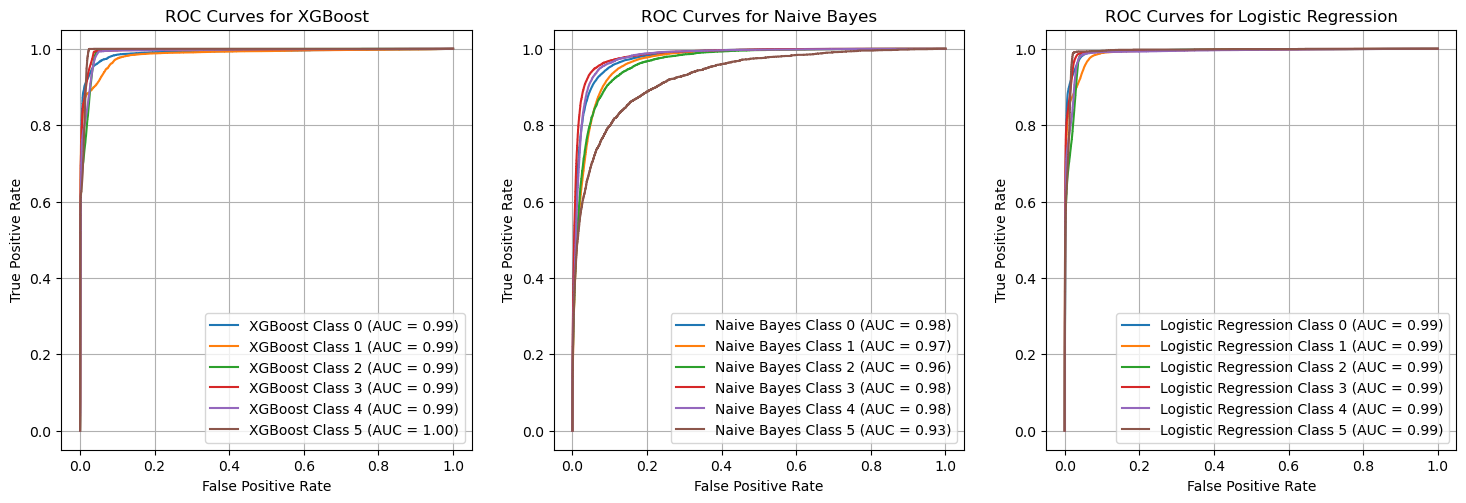

In [86]:
# accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
# roc_auc_logistic_regression = roc_auc_score(y_test_enc, y_pred_prob_logistic_regression, multi_class='ovr')
# log_loss_logistic_regression = log_loss(y_test, y_pred_prob_logistic_regression)

# Plotting ROC curves and Accuracy comparison
plt.figure(figsize=(18, 12))

# Plotting ROC curves for each model
plt.subplot(2, 3, 1)
for i in range(y_test_enc.shape[1]):
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_enc[:, i], y_pred_prob_xgb[:, i])
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost Class {i} (AUC = {roc_auc_score(y_test_enc[:, i], y_pred_prob_xgb[:, i]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
for i in range(y_test_enc.shape[1]):
    fpr_nb, tpr_nb, _ = roc_curve(y_test_enc[:, i], y_pred_prob_nb[:, i])
    plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes Class {i} (AUC = {roc_auc_score(y_test_enc[:, i], y_pred_prob_nb[:, i]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
for i in range(y_test_enc.shape[1]):
    fpr_logistic, tpr_logistic, _ = roc_curve(y_test_enc[:, i], y_pred_prob_logistic_regression[:, i])
    plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression Class {i} (AUC = {roc_auc_score(y_test_enc[:, i], y_pred_prob_logistic_regression[:, i]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

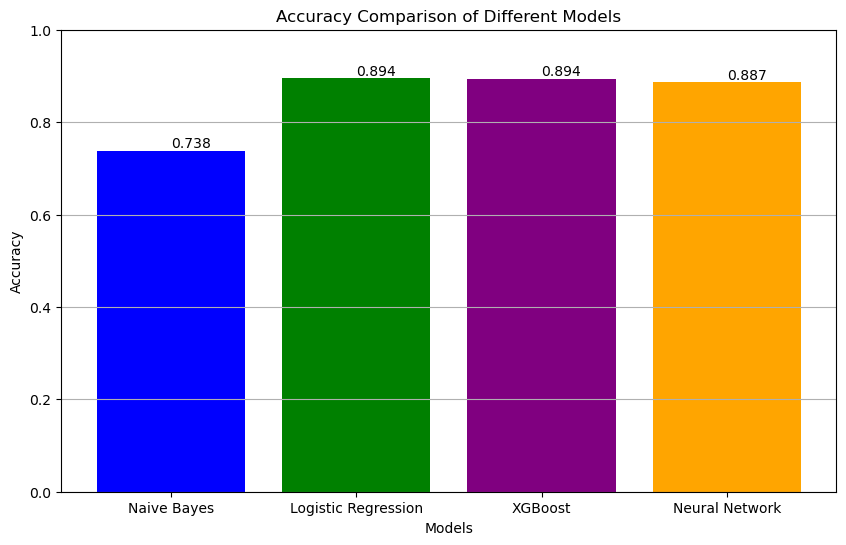

In [85]:
#plot accuracy of naive bayes logistic , xgboost and neural network
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
# means_baseline = score_baseline
means_naive_bayes = accuracy_nb
means_logistic_regression = accuracy_lr
means_xgboost = accuracy_xgb
means_neuralnet = accuracy_neuralnet
model_names = ['Naive Bayes', 'Logistic Regression', 'XGBoost', 'Neural Network']
# create plot
accuracy_scores = [means_naive_bayes, means_logistic_regression, means_xgboost, means_neuralnet]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'purple', 'orange'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')

plt.ylim([0, 1.0])  # Set y-axis limits from 0.7 to 1.0
plt.grid(axis='y')

plt.show()


In [58]:
sentence="i am sad fotr what u did it is not faitr i did not expect this from you"
sentence = f(sentence)
sentence = vectorization.transform([sentence])
predicted_label=xgb.predict(sentence)
label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

predicted_emotion = label_mapping.get(predicted_label[0], 'Unknown')
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: sadness


In [68]:
sentence="i am feeling happy for what u did it is fair i did not expect this from you"
sentence = f(sentence)
sentence = vectorization.transform([sentence])
predicted_label=logistic_regression.predict(sentence)

predicted_emotion = label_mapping.get(predicted_label[0], 'Unknown')
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: joy


In [88]:
import joblib

# Assuming xgb is your trained XGBoost model
joblib.dump(xgb, 'xgboost_model.pkl')
# Assuming vectorization is your TfidfVectorizer instance
joblib.dump(vectorization, 'tfidf_vectorizer.pkl')

# Assuming logistic_regression is your trained Logistic Regression model
joblib.dump(logistic_regression, 'logistic_regression_model.pkl')

# Assuming nb_classifier is your trained Naive Bayes model
joblib.dump(nb_classifier, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']